In [302]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from tensorflow import keras
from tensorflow.keras import layers


In [303]:
%matplotlib inline
plt.style.use('seaborn-dark-palette')

In [304]:
# read data downloaded from exoplanetarchive.ipac.caltech.edu
exo = pd.read_csv('/home/juan/Documents/Machine Learning/proyectos/exorad_predict/all_exoplanets_december4_2022.csv')

In [305]:
exo.head()

,pl_name,default_flag,pl_controv_flag,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,pl_orbsmaxerr1,pl_orbsmaxerr2,...,st_masserr2,st_masslim,st_met,st_meterr1,st_meterr2,st_metlim,st_logg,st_loggerr1,st_loggerr2,st_logglim
0,11 Com b,1,0,326.030000,0.320000,-0.320000,0.0,1.290000,0.050000,-0.050000,...,-0.30,0.0,-0.35,0.09,-0.09,0.0,2.31,0.10,-0.10,0.0
1,11 UMi b,1,0,516.219970,3.200000,-3.200000,0.0,1.530000,0.070000,-0.070000,...,-0.69,0.0,-0.02,NaN,NaN,0.0,1.93,0.07,-0.07,0.0
2,14 And b,1,0,185.840000,0.230000,-0.230000,0.0,0.830000,NaN,NaN,...,-0.20,0.0,-0.24,0.03,-0.03,0.0,2.63,0.07,-0.07,0.0
3,14 Her b,1,0,1765.038901,1.677089,-1.872561,0.0,2.773069,0.110517,-0.118828,...,-0.11,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,16 Cyg B b,1,0,798.500000,1.000000,-1.000000,0.0,1.660000,0.030000,-0.030000,...,-0.04,0.0,0.06,NaN,NaN,0.0,4.36,0.01,-0.01,0.0


In [306]:
exo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2249 entries, 0 to 2248
Data columns (total 52 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pl_name          2249 non-null   object 
 1   default_flag     2249 non-null   int64  
 2   pl_controv_flag  2249 non-null   int64  
 3   pl_orbper        2064 non-null   float64
 4   pl_orbpererr1    1950 non-null   float64
 5   pl_orbpererr2    1950 non-null   float64
 6   pl_orbperlim     2064 non-null   float64
 7   pl_orbsmax       1925 non-null   float64
 8   pl_orbsmaxerr1   1814 non-null   float64
 9   pl_orbsmaxerr2   1814 non-null   float64
 10  pl_orbsmaxlim    1926 non-null   float64
 11  pl_rade          1020 non-null   float64
 12  pl_radeerr1      1001 non-null   float64
 13  pl_radeerr2      1001 non-null   float64
 14  pl_radelim       1020 non-null   float64
 15  pl_bmasse        2249 non-null   float64
 16  pl_bmasseerr1    2088 non-null   float64
 17  pl_bmasseerr2 

Text(0, 0.5, 'log10(Radius)')

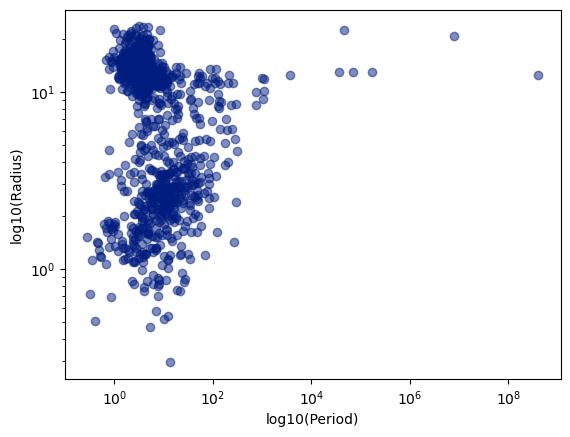

In [307]:
plt.plot(exo['pl_orbper'], exo['pl_rade'], 'o', alpha=0.5)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('log10(Period)')
plt.ylabel('log10(Radius)')

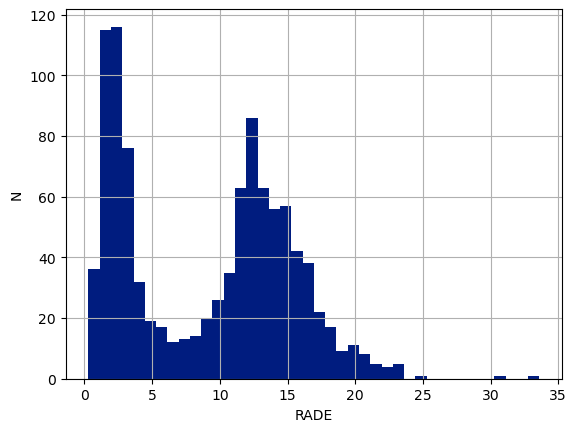

In [308]:
exo['pl_rade'].hist(bins=40)
plt.xlabel('RADE')
plt.ylabel('N')
plt.show()

In [309]:
exo.columns

Index(['pl_name', 'default_flag', 'pl_controv_flag', 'pl_orbper',
       'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbperlim', 'pl_orbsmax',
       'pl_orbsmaxerr1', 'pl_orbsmaxerr2', 'pl_orbsmaxlim', 'pl_rade',
       'pl_radeerr1', 'pl_radeerr2', 'pl_radelim', 'pl_bmasse',
       'pl_bmasseerr1', 'pl_bmasseerr2', 'pl_bmasselim', 'pl_orbeccen',
       'pl_orbeccenerr1', 'pl_orbeccenerr2', 'pl_orbeccenlim', 'pl_insol',
       'pl_insolerr1', 'pl_insolerr2', 'pl_insollim', 'pl_eqt', 'pl_eqterr1',
       'pl_eqterr2', 'pl_eqtlim', 'st_spectype', 'st_teff', 'st_tefferr1',
       'st_tefferr2', 'st_tefflim', 'st_rad', 'st_raderr1', 'st_raderr2',
       'st_radlim', 'st_mass', 'st_masserr1', 'st_masserr2', 'st_masslim',
       'st_met', 'st_meterr1', 'st_meterr2', 'st_metlim', 'st_logg',
       'st_loggerr1', 'st_loggerr2', 'st_logglim'],
      dtype='object')

In [310]:
# lets drop some columns
exo2 = exo.drop(['pl_name', 'default_flag', 'pl_controv_flag', 
       'pl_orbperlim', 'pl_orbsmaxerr1', 'pl_orbsmaxerr2', 'pl_orbsmaxlim', 
       'pl_radelim', 'pl_bmasselim',
       'pl_orbeccenerr1', 'pl_orbeccenerr2', 'pl_orbeccenlim', 
       'pl_insolerr1', 'pl_insolerr2', 'pl_insollim', 'pl_eqterr1',
       'pl_eqterr2', 'pl_eqtlim', 'st_spectype', 'st_tefferr1',
       'st_tefferr2', 'st_tefflim', 'st_raderr1', 'st_raderr2',
       'st_radlim','st_masserr1', 'st_masserr2', 'st_masslim',
       'st_meterr1', 'st_meterr2', 'st_metlim', 'st_logg', 'st_teff',
       'st_loggerr1', 'st_loggerr2', 'st_logglim'], axis=1)

In [311]:
exo2.columns

Index(['pl_orbper', 'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbsmax', 'pl_rade',
       'pl_radeerr1', 'pl_radeerr2', 'pl_bmasse', 'pl_bmasseerr1',
       'pl_bmasseerr2', 'pl_orbeccen', 'pl_insol', 'pl_eqt', 'st_rad',
       'st_mass', 'st_met'],
      dtype='object')

In [312]:
# the feature that limits the number of points is pl_eqt
exo2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2249 entries, 0 to 2248
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pl_orbper      2064 non-null   float64
 1   pl_orbpererr1  1950 non-null   float64
 2   pl_orbpererr2  1950 non-null   float64
 3   pl_orbsmax     1925 non-null   float64
 4   pl_rade        1020 non-null   float64
 5   pl_radeerr1    1001 non-null   float64
 6   pl_radeerr2    1001 non-null   float64
 7   pl_bmasse      2249 non-null   float64
 8   pl_bmasseerr1  2088 non-null   float64
 9   pl_bmasseerr2  2088 non-null   float64
 10  pl_orbeccen    1790 non-null   float64
 11  pl_insol       312 non-null    float64
 12  pl_eqt         715 non-null    float64
 13  st_rad         1660 non-null   float64
 14  st_mass        2223 non-null   float64
 15  st_met         1548 non-null   float64
dtypes: float64(16)
memory usage: 281.2 KB


In [313]:
# drop columns 
exo2.drop(['pl_orbpererr1', 'pl_orbpererr2', 'pl_radeerr1', 'pl_radeerr2', 
        'pl_bmasseerr1', 'pl_bmasseerr2', 'pl_orbeccen', 'pl_insol', 'pl_eqt'], axis=1, inplace=True)

In [314]:
# create a dataframe with only the rows that have a value for pl_bmasse
exo_data = exo2[exo2['pl_rade'].notna()]
exo_norad = exo2[~exo2['pl_rade'].notna()]

In [315]:
exo_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1020 entries, 14 to 2202
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pl_orbper   1005 non-null   float64
 1   pl_orbsmax  765 non-null    float64
 2   pl_rade     1020 non-null   float64
 3   pl_bmasse   1020 non-null   float64
 4   st_rad      1001 non-null   float64
 5   st_mass     1009 non-null   float64
 6   st_met      864 non-null    float64
dtypes: float64(7)
memory usage: 63.8 KB


In [316]:
# drop values with pl_bmasse greater than 3100 and pl_orbper greater than 60000 to avoid outliers
exo_data = exo_data[exo_data['pl_bmasse'] < 3100]
exo_norad = exo_norad[exo_norad['pl_bmasse'] < 3100]

exo_data = exo_data[exo_data['pl_orbper'] < 60000]
exo_norad = exo_norad[exo_norad['pl_orbper'] < 60000]


In [317]:
exo_data.describe()

,pl_orbper,pl_orbsmax,pl_rade,pl_bmasse,st_rad,st_mass,st_met
count,987.000000,734.000000,987.000000,987.000000,981.000000,982.000000,849.000000
mean,58.294439,0.139923,8.939332,291.571295,1.143731,1.011517,0.049392
std,1179.862525,0.907553,6.011270,461.267175,0.542402,0.342968,0.194169
min,0.280324,0.007100,0.296000,0.066000,0.120000,0.090000,-0.500000
25%,2.967363,0.037365,2.670000,10.635000,0.810000,0.830000,-0.070000
50%,4.457240,0.050950,10.160000,123.953700,1.040000,1.000000,0.050000
75%,11.385252,0.089082,13.788500,367.250725,1.440000,1.180000,0.190000
max,37000.000000,24.000000,23.539000,3082.951000,6.300000,2.780000,0.522000


In [318]:
#drop rows with nan values
exo_data = exo_data[exo_data['st_met'].notna()]
#exo_data = exo_data[exo_data['st_logg'].notna()]
exo_data = exo_data[exo_data['st_rad'].notna()]
exo_data = exo_data[exo_data['st_mass'].notna()]

#exo_data = exo_data[exo_data['pl_eqt'].notna()]

exo_norad = exo_norad[exo_norad['st_met'].notna()]
#exo_norad = exo_norad[exo_norad['st_logg'].notna()]
exo_norad = exo_norad[exo_norad['st_rad'].notna()]
exo_norad = exo_norad[exo_norad['st_mass'].notna()]

#exo_norad = exo_norad[exo_norad['pl_eqt'].notna()]

In [319]:
exo_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 847 entries, 30 to 2202
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pl_orbper   847 non-null    float64
 1   pl_orbsmax  654 non-null    float64
 2   pl_rade     847 non-null    float64
 3   pl_bmasse   847 non-null    float64
 4   st_rad      847 non-null    float64
 5   st_mass     847 non-null    float64
 6   st_met      847 non-null    float64
dtypes: float64(7)
memory usage: 52.9 KB


In [320]:
# drop rows with no value of pl_orbper
exo_data = exo_data[exo_data['pl_orbper'].notna()]
exo_norad = exo_norad[exo_norad['pl_orbper'].notna()]

<AxesSubplot:>

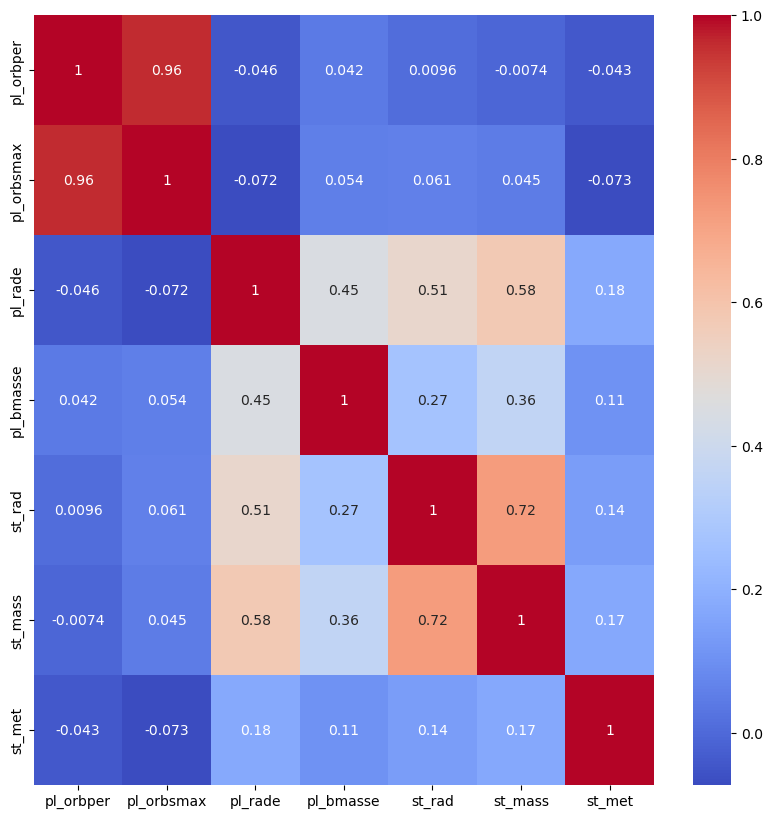

In [321]:
# plot correlation of all columns with pl_bmasse
plt.figure(figsize=(10,10))
sns.heatmap(exo_data.corr(), annot=True, cmap='coolwarm')

In [322]:
# drop pl_orbsmax
exo_data = exo_data.drop(['pl_orbsmax'], axis=1)
exo_norad = exo_norad.drop(['pl_orbsmax'], axis=1)


In [323]:
exo_norad.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 509 entries, 2 to 2248
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pl_orbper  509 non-null    float64
 1   pl_rade    0 non-null      float64
 2   pl_bmasse  509 non-null    float64
 3   st_rad     509 non-null    float64
 4   st_mass    509 non-null    float64
 5   st_met     509 non-null    float64
dtypes: float64(6)
memory usage: 27.8 KB


In [324]:
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [325]:
exo_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 847 entries, 30 to 2202
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pl_orbper  847 non-null    float64
 1   pl_rade    847 non-null    float64
 2   pl_bmasse  847 non-null    float64
 3   st_rad     847 non-null    float64
 4   st_mass    847 non-null    float64
 5   st_met     847 non-null    float64
dtypes: float64(6)
memory usage: 46.3 KB


In [326]:
# save the target column for training and drop it from the noradius dataset
t = exo_data['pl_rade']
X = exo_data.drop(['pl_rade'], axis=1)

exo_norad = exo_norad.drop(['pl_rade'], axis=1)


In [327]:
# split data into train and test
X_train, X_test, t_train, t_test = train_test_split(X, t, test_size=0.2, random_state=42)


In [328]:
# scale the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [329]:
# create a random forest model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [330]:
# train the model
model = RandomForestRegressor(n_estimators=400, random_state=42, max_depth=7, max_features=1.0, max_leaf_nodes=None, min_samples_leaf=4, min_samples_split=2)
model.fit(X_train, t_train)

# predict the target values
t_pred = model.predict(X_test)

# calculate the mean squared error
mse = mean_squared_error(t_test, t_pred)
print('Mean squared error: ', mse)

# calculate the r2 score
r2 = r2_score(t_test, t_pred)
print('R2 score: ', r2)

Mean squared error:  5.374999349114133
R2 score:  0.8580596925509478


Text(0, 0.5, 'Predicted values')

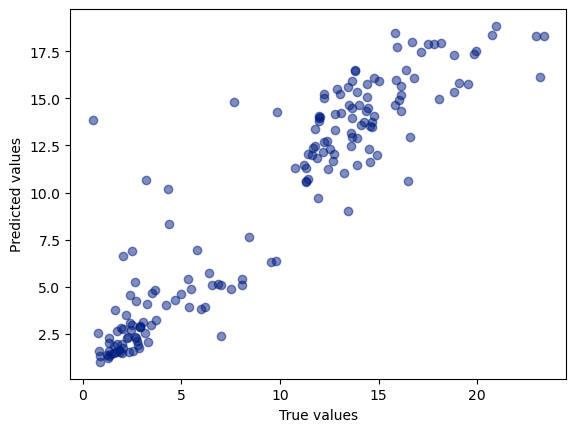

In [331]:
# plot the predicted values against the true values
plt.plot(t_test, t_pred, 'o', alpha=0.5)
plt.xlabel('True values')
plt.ylabel('Predicted values')


Text(0, 0.5, 'Feature')

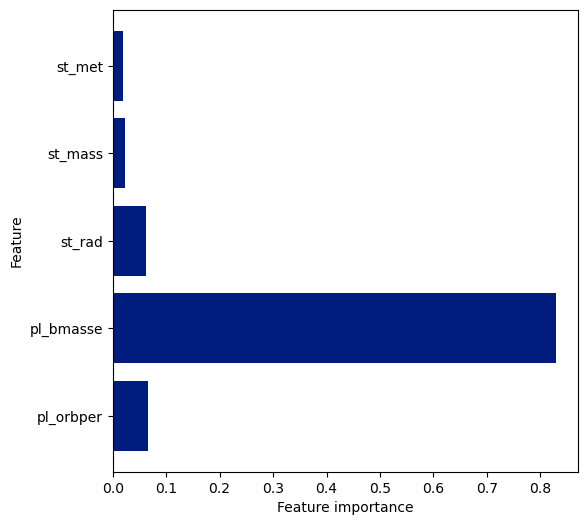

In [332]:
# plot the feature importances
plt.figure(figsize=(6,6))
plt.barh(X.columns, model.feature_importances_)
plt.xlabel('Feature importance')
plt.ylabel('Feature')


In [333]:
# # search for the best parameters for the random forest model
# from sklearn.model_selection import GridSearchCV

# rfr = RandomForestRegressor(random_state=42)
# param_grid = {'n_estimators': np.arange(50, 651, 50),
#               'max_depth': np.arange(1, 21, 2),
#               'min_samples_leaf': [1, 2, 4],
#               'min_samples_split': [2, 4],
#               'max_features': [1.0, 'sqrt'],
#               'max_leaf_nodes': [None, 2, 4, 6, 8, 10]
#               }

# rfgs = GridSearchCV(rfr, param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
# rfgs.fit(X_train, t_train)
# print(rfgs.best_params_)
# print('Best RMSE (train): {:.4f} m/s'.format(1e3*np.sqrt(mean_squared_error(t_train, rfgs.predict(X_train)))))
# print('Best RMSE (test) : {:.4f} m/s'.format(1e3*np.sqrt(mean_squared_error(t_test, rfgs.predict(X_test)))))
# print('CV SCORE [m/s]: {:.3f}'.format(1e3*np.sqrt(-rfgs.best_score_)))

In [334]:
# create a gradient boosting model
from sklearn.ensemble import GradientBoostingRegressor

# train the model
params = {
    'n_estimators': 100,
    'max_depth': 3,
    'learning_rate': 0.09,
    'max_leaf_nodes': None,
    'random_state': 42
}

model_gb = GradientBoostingRegressor(**params)
model_gb.fit(X_train, t_train)

# predict the target values
t_pred_gb = model_gb.predict(X_test)

# calculate the mean squared error
mse_gb = mean_squared_error(t_test, t_pred_gb)
print('Mean squared error: ', mse_gb)

# calculate the r2 score
r2_gb = r2_score(t_test, t_pred_gb)
print('R2 score: ', r2_gb)

Mean squared error:  5.293424481952967
R2 score:  0.8602138810397111


Text(0, 0.5, 'Predicted values')

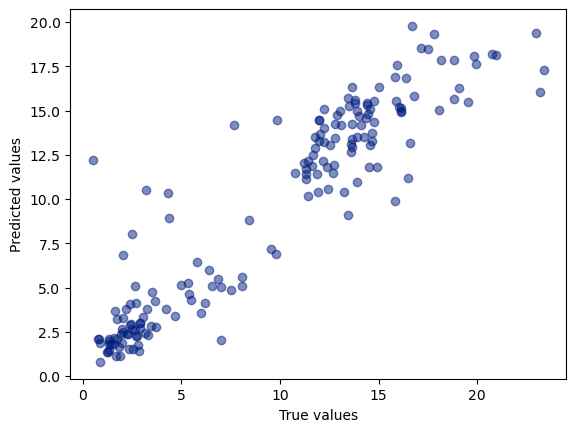

In [335]:
# plot the predicted values against the true values
plt.plot(t_test, t_pred_gb, 'o', alpha=0.5)
plt.xlabel('True values')
plt.ylabel('Predicted values')


In [336]:
# test_score = np.zeros((params['n_estimators'],), dtype=np.float64)
# for i, y_pred in enumerate(model_gb.staged_predict(X_test)):
#     test_score[i] = model_gb.loss_(t_test, t_pred_gb)

# fig = plt.figure(figsize=(6, 6))
# plt.subplot(1, 1, 1)
# plt.plot(np.arange(params['n_estimators']) + 1, 1e3*np.sqrt(model_gb.train_score_), 'b-',
#          label='Training Set Deviance')
# plt.plot(np.arange(params['n_estimators']) + 1, 1e3*np.sqrt(test_score), 'r-',
#          label='Test Set Deviance')
# plt.legend(loc='upper right')
# plt.xlabel('Boosting Iterations')
# plt.ylabel('Deviance [m/s]')

# plt.grid(True)
# fig.tight_layout()
# plt.show()

In [337]:
# # search for the best parameters for the gradient boosting model
# from sklearn.model_selection import GridSearchCV
# gradb = GradientBoostingRegressor(random_state=42)
# param_grid = {
#               'n_estimators': np.logspace(2,4,50, dtype='int'), 
#               'learning_rate': np.arange(0.09, 0.21, 0.01),
#               #'min_samples_split': [2, 4],
#               #'min_samples_leaf': [1, 2], 
#               'max_depth': [3],
#               'max_leaf_nodes': [None, 2, 4, 6],
#               }

# gradb_s = GridSearchCV(gradb, param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error', return_train_score=True)
# gradb_s.fit(X_train, t_train)
# print(gradb_s.best_params_)
# print('Best RMSE (train): {:.4f} m/s'.format(mse(t_train, gradb_s.predict(X_train))))
# print('Best RMSE (test): {:.4f} m/s'.format(mse(t_test, gradb_s.predict(X_test))))


In [338]:
exo_data.info()
exo_norad.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 847 entries, 30 to 2202
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pl_orbper  847 non-null    float64
 1   pl_rade    847 non-null    float64
 2   pl_bmasse  847 non-null    float64
 3   st_rad     847 non-null    float64
 4   st_mass    847 non-null    float64
 5   st_met     847 non-null    float64
dtypes: float64(6)
memory usage: 46.3 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 509 entries, 2 to 2248
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pl_orbper  509 non-null    float64
 1   pl_bmasse  509 non-null    float64
 2   st_rad     509 non-null    float64
 3   st_mass    509 non-null    float64
 4   st_met     509 non-null    float64
dtypes: float64(5)
memory usage: 23.9 KB


In [339]:
# now with our model trained predict the radius for the no radius dataset

# scaling the data
norad = scaler.transform(exo_norad)
# predict 
norad_predict = model.predict(norad)

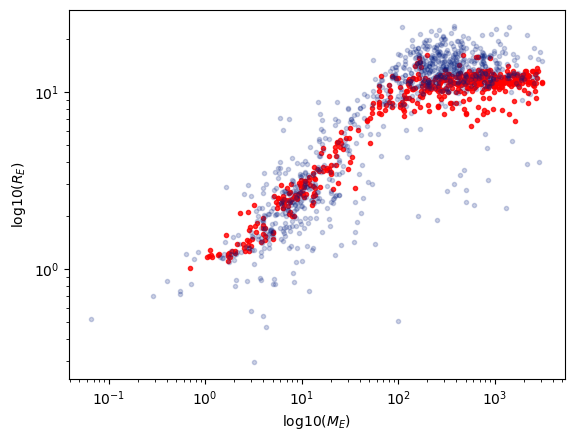

In [340]:
# plot mass vs radius for the predicted dataset and the training dataset
plt.plot(exo_norad['pl_bmasse'], norad_predict, 'o', color='red', ms=3, alpha=0.8)
plt.plot(exo_data['pl_bmasse'], t, 'o', ms=3, alpha=0.2)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('log10($M_E$)')
plt.ylabel('log10($R_E$)')
plt.show()

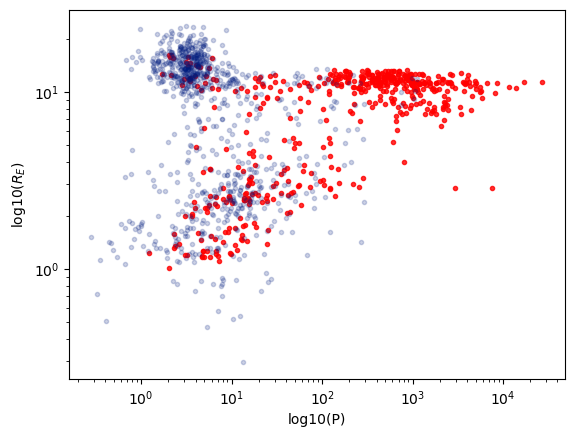

In [341]:
# plot pl_orbper vs pl_rade for the predicted dataset and the training dataset
plt.plot(exo_norad['pl_orbper'], norad_predict, 'o', color='red', ms=3, alpha=0.8)
plt.plot(exo_data['pl_orbper'], t, 'o', ms=3, alpha=0.2)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('log10(P)')
plt.ylabel('log10($R_E$)')
plt.show()


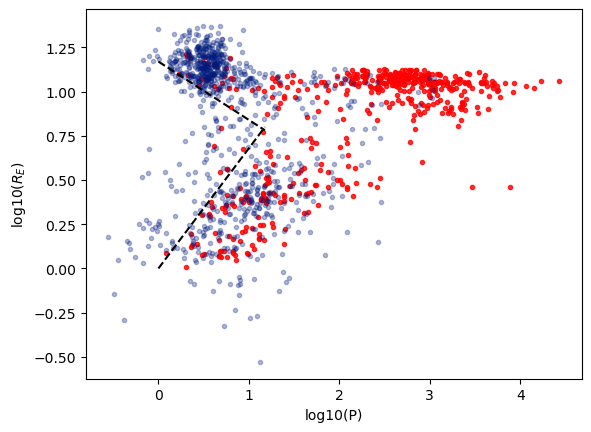

In [342]:
# add the limits of the Neptunian Desert as defined by Mazeh et al. 2016
# for the P vs RadE plot
def des3(x):
    return -0.33*x+1.17
def des4(x):
    return 0.68*x
x=np.linspace(1,15,100)
plt.plot(np.log10(exo_norad['pl_orbper']), np.log10(norad_predict), 'o', color='red', markersize=3, alpha=0.8)
plt.plot(np.log10(exo_data['pl_orbper']), np.log10(exo_data['pl_rade']), 'o', markersize=3, alpha=0.3)
plt.plot(np.log10(x),des3(np.log10(x)), color='black', linestyle='--')
plt.plot(np.log10(x),des4(np.log10(x)), color='black', linestyle='--')
plt.xlabel('log10(P)')
plt.ylabel('log10($R_E$)')
plt.show()

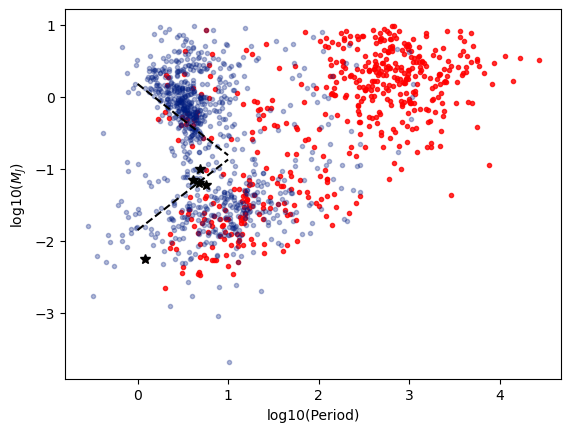

In [383]:
# add the limits of the Neptunian Desert as defined by Mazeh et al. 2016
# for the P vs M_J plot
def des1(x):
    return 0.98*x-1.85
def des2(x):
    return -0.99*x+0.18
x=np.linspace(1,10,100)
plt.plot(np.log10(exo_norad['pl_orbper']), np.log10(exo_norad['pl_bmasse']*0.00314558), 'o', color='red', markersize=3, alpha=0.8)
plt.plot(np.log10(exo_data['pl_orbper']), np.log10(exo_data['pl_bmasse']*0.00314558), 'o', markersize=3, alpha=0.3)
plt.plot(np.log10(x),des1(np.log10(x)), color='black', linestyle='--')
plt.plot(np.log10(x),des2(np.log10(x)), color='black', linestyle='--')
plt.plot([0.6798846649537431], [-1.202356365116281], '*', color='black', markersize=7)
plt.plot([0.08637050991595242], [-2.251879262830154], '*', color='black', markersize=7)
plt.plot([0.6111389003956459], [-1.1550063372265538], '*', color='black', markersize=7)
plt.plot([0.6943743912514695], [-1.0001043772408107], '*', color='black', markersize=7)
plt.plot([0.7586167139759268], [-1.221953126857167], '*', color='black', markersize=7)
plt.xlabel('log10(Period)')
plt.ylabel('log10($M_J$)')
plt.show()

In [372]:
# let's identify the planets that are in the Neptunian Desert
k=0
indexes = []
names = []
for i,j in zip(norad_predict, exo_norad['pl_orbper']):
    if np.log10(i) < des3(np.log10(j)) and np.log10(i) > des4(np.log10(j)):
        indexes.append(k)
        names.append(exo_norad.iloc[k].name)
        print('valor: '+str(i))
    k=k+1

valor: 1.222124132085593
valor: 3.5113496784613214
valor: 4.906882456725377
valor: 6.24771910623427
valor: 3.674953291367382
valor: 4.759912872189733
valor: 3.6582883580189427


In [374]:
for i in names:
    print('name: ', exo.loc[i]['pl_name'], ', log10(P): ', np.log10(exo.loc[i]['pl_orbper']), ', log10(mass_j): ', np.log10(exo.loc[i]['pl_bmasse']*0.00314558))


name:  GJ 3138 b , log10(P):  0.08637050991595242 , log10(mass_j):  -2.251879262830154
name:  HD 213885 c , log10(P):  0.6798846649537431 , log10(mass_j):  -1.202356365116281
name:  HD 47186 b , log10(P):  0.6111389003956459 , log10(mass_j):  -1.1550063372265538
name:  HD 49674 b , log10(P):  0.6943743912514695 , log10(mass_j):  -1.0001043772408107
name:  HD 77338 b , log10(P):  0.7586167139759268 , log10(mass_j):  -1.221953126857167
name:  TOI-1272 c , log10(P):  0.9389697972228902 , log10(mass_j):  -1.0757880037744727
name:  WASP-107 b , log10(P):  0.7575079439042369 , log10(mass_j):  -1.017999425792262


In [375]:
names

[165, 783, 964, 974, 1044, 1856, 2017]